In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point #pull a utility function to add a cyclic point (gets rid of white stripe)
from matplotlib.gridspec import GridSpec

In [2]:
# Open dataset 
dir = '/chinook/dallmann/SOARS/'
fn = 'tos_Omon_CESM2_omip2_r1i1p1f1_gn_030601-036612_anom.nc'

data_tos = xr.open_dataset(dir+fn)

In [3]:
# Change the time to be from DatetimeNoLeap to a Datetime64
data_tos['time'] = np.arange('1958-01-01','2019-01-01',dtype = 'datetime64[M]')
data_tos

<xarray.Dataset>
Dimensions:    (bnds: 2, nlat: 384, nlon: 320, time: 732, vertices: 4)
Coordinates:
    lon        (nlat, nlon) float64 ...
    lat        (nlat, nlon) float64 ...
  * time       (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2018-12-01
Dimensions without coordinates: bnds, nlat, nlon, vertices
Data variables:
    lon_bnds   (nlat, nlon, vertices) float64 ...
    lat_bnds   (nlat, nlon, vertices) float64 ...
    time_bnds  (time, bnds) object ...
    tos        (time, nlat, nlon) float32 ...
Attributes: (12/45)
    CDI:                    Climate Data Interface version 1.7.2 (http://mpim...
    history:                Tue Jun 08 14:39:51 2021: cdo ymonsub tos_Omon_CE...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            OMIP
    ...                     ...
    variable_id:            tos
    variant_info:           CMIP6 omip2 experiment (JRA forcing) with interac...
    variant_label:          r1i1p1f1
    source_type:            OGCM BGC
    comment:                Experiment run for 6 cycles of 1958-2018 JRA55 fo...
    CDO:                    Climate Data Operators version 1.7.2 (http://mpim...

In [4]:
# assign desired variable: 
tos = data_tos['tos']

In [5]:
tos

<xarray.DataArray 'tos' (time: 732, nlat: 384, nlon: 320)>
[89948160 values with dtype=float32]
Coordinates:
    lon      (nlat, nlon) float64 ...
    lat      (nlat, nlon) float64 ...
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2018-12-01
Dimensions without coordinates: nlat, nlon
Attributes: (12/18)
    standard_name:  sea_surface_temperature
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area: mean where sea time: mean
    comment:        TEMP[:,0,:,:]
    description:    This may differ from "surface temperature" in regions of ...
    ...             ...
    time:           time
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    variable_id:    tos

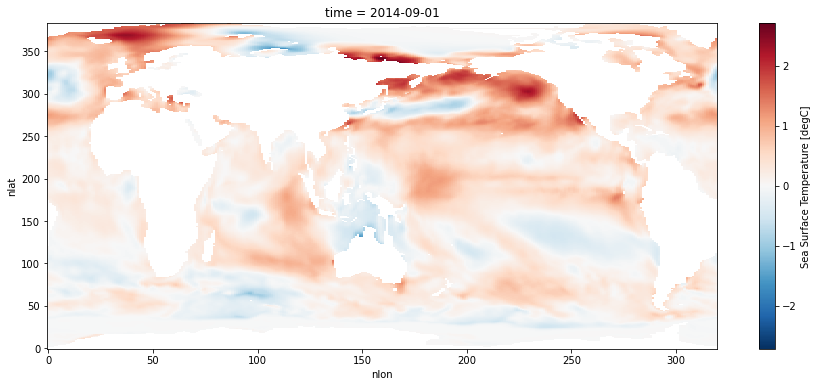

In [6]:
# sanity check
mean_tos = tos.isel(time=680)

fig=plt.figure(figsize=(15,6))
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()
#ax.coastlines()

mean_tos.plot()

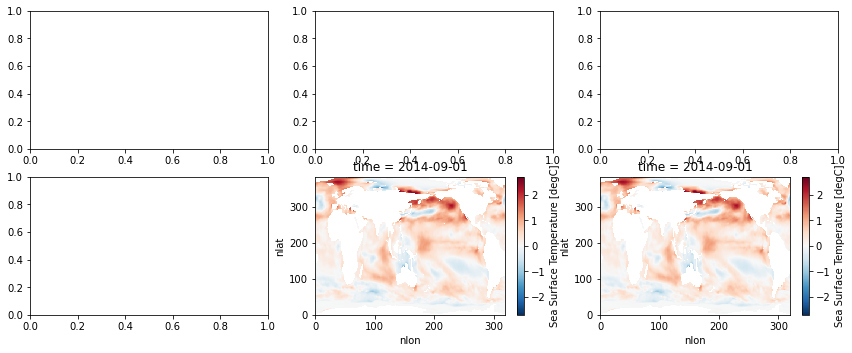

In [7]:
fig = plt.figure(figsize=(40,30))

gs=GridSpec(10,8)  # adjust size as needed
ax=plt.subplot(gs[0,0])
ax=plt.subplot(gs[0,1])
ax=plt.subplot(gs[0,2])
ax=plt.subplot(gs[1,0])
ax=plt.subplot(gs[1,1])

mean_tos.plot()

ax=plt.subplot(gs[1,2])

mean_tos.plot()